In [1]:
import os
import seaborn as sb
import numpy as np
import pandas as pd
import sklearn as sk

In [2]:
Pat = [5, 4, 4, 3, 9, 4]
Jack = [4, 8, 7, 5, 1, 5]
Alex = [9, 9, 8, 10, 4, 10]

In [3]:
all_scores = Pat+Jack+Alex
company_names = (['Pat'] * len(Pat)) +  (['Jack'] * len(Jack)) +  (['Alex'] * len(Alex))

In [4]:
data = pd.DataFrame({'names': company_names, 'score': all_scores})

In [5]:
data

,names,score
0,Pat,5
1,Pat,4
2,Pat,4
3,Pat,3
4,Pat,9
5,Pat,4
6,Jack,4
7,Jack,8
8,Jack,7
9,Jack,5


In [6]:
data.groupby('names').mean()

,score
names,
Alex,8.333333
Jack,5.000000
Pat,4.833333


In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [8]:
lm = ols('score ~ names',data=data).fit()
table = sm.stats.anova_lm(lm)
print(table)

            df     sum_sq    mean_sq         F    PR(>F)
names      2.0  46.777778  23.388889  4.488273  0.029668
Residual  15.0  78.166667   5.211111       NaN       NaN


In [9]:
from pingouin import ancova

In [10]:
overall_mean = data['score'].mean()
print('overall_mean=',overall_mean) # XrG

overall_mean= 6.055555555555555


In [11]:
data['overall_mean'] = overall_mean
ss_total = sum((data['score'] - data['overall_mean'])**2)
print('ss_total(btwn)=',ss_total)

ss_total(btwn)= 124.94444444444446


In [12]:
group_means = data.groupby('names').mean()
group_means = group_means.rename(columns = {'score': 'group_mean'})
group_means

,group_mean,overall_mean
names,,
Alex,8.333333,6.055556
Jack,5.000000,6.055556
Pat,4.833333,6.055556


In [13]:
data = data.merge(group_means, left_on = 'names', right_index = True)
data

,names,score,overall_mean_x,group_mean,overall_mean_y
0,Pat,5,6.055556,4.833333,6.055556
1,Pat,4,6.055556,4.833333,6.055556
2,Pat,4,6.055556,4.833333,6.055556
3,Pat,3,6.055556,4.833333,6.055556
4,Pat,9,6.055556,4.833333,6.055556
5,Pat,4,6.055556,4.833333,6.055556
6,Jack,4,6.055556,5.000000,6.055556
7,Jack,8,6.055556,5.000000,6.055556
8,Jack,7,6.055556,5.000000,6.055556
9,Jack,5,6.055556,5.000000,6.055556


In [14]:
ss_residual = sum((data['score'] - data['group_mean'])**2)
print('ss_residual (within)=',ss_residual) 

ss_residual (within)= 78.16666666666666


In [15]:
ss_explained = sum((data['group_mean'] - data['overall_mean_x'])**2)
print('ss_explained(between)=',ss_explained)

ss_explained(between)= 46.77777777777779


In [16]:
n_groups = len(set(data['names'])) # K
n_obs = data.shape[0] # N 
df_residual = n_obs - n_groups # df_within
ms_residual = ss_residual / df_residual # MS_within = ss_within / df_within
print('ms_residual(within)=',ms_residual)

ms_residual(within)= 5.21111111111111


In [17]:

#compute Mean Square Explained
df_explained = n_groups - 1 # df_bw
ms_explained = ss_explained / df_explained # MS_bw = ss_bw / df_bw
print('ms_explained(between)=',ms_explained)

ms_explained(between)= 23.388888888888896


In [18]:
f = ms_explained / ms_residual  # F = MS_bw / MS_within  or  F = (ss_bw/ df_bw ) / (ss_within/ df_within)
f

4.488272921108744

In [19]:
import scipy.stats
p_value = 1 - scipy.stats.f.cdf(f, df_explained, df_residual)
p_value

0.029667763955533277

In [20]:
critical_value=scipy.stats.f.ppf(1-0.05,df_explained,df_residual)
critical_value

3.6823203436732412

In [21]:
import seaborn as sns 
import matplotlib.pyplot as plt

AxesSubplot(0.125,0.125;0.775x0.755)


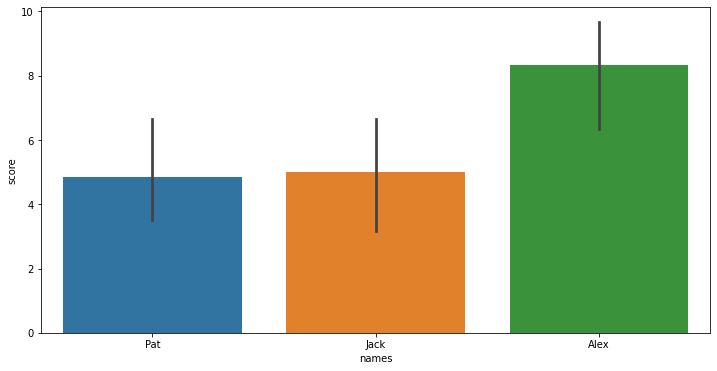

In [22]:
plt.figure(figsize=(12,6))
print(sns.barplot(x='names',y='score',data=data))

### By observing the above graph we can say that Alex is the best player because his average or mean score is greater than the other two players.